# Exercise for Chapter 2 (Solutions)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.stattools import jarque_bera

In [2]:
pd.options.display.max_columns = None
pd.options.display.width=None
sns.set(style="darkgrid")

## Exercise 1

In [3]:
fx_prices = pd.read_csv('../datasets/exchange_rates_1.csv',index_col='Date',parse_dates=['Date'])
fx_prices.head()

,USD_by_INR,GBP_by_INR,EUR_by_INR
Date,,,
2006-12-04,44.590011,88.240010,59.399955
2006-12-05,45.096562,89.270642,60.174054
2006-12-06,44.694182,87.952341,59.382149
2006-12-07,44.656595,87.939501,59.435016
2006-12-08,44.655384,87.603877,59.339540


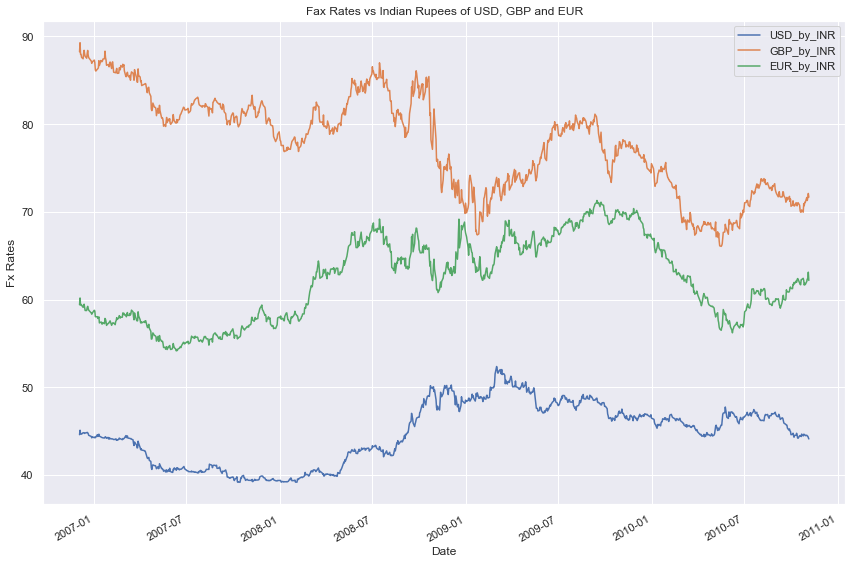

In [4]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_prices.plot(ax = ax)
_ = plt.ylabel('Fx Rates')
_ = plt.title('Fax Rates vs Indian Rupees of USD, GBP and EUR')
plt.tight_layout()
plt.show()

In [41]:
fx_returns = fx_prices.apply(lambda s: np.log(s) - np.log(s).shift(1),axis=0).dropna()
fx_returns.head()

,USD_by_INR,GBP_by_INR,EUR_by_INR
Date,,,
2006-12-05,0.011296,0.011612,0.012948
2006-12-06,-0.008963,-0.014878,-0.013248
2006-12-07,-0.000841,-0.000146,0.000890
2006-12-08,-0.000027,-0.003824,-0.001608
2006-12-11,0.003565,-0.001852,-0.003920


In [42]:
print( f"Mean:\n{fx_returns.mean(axis=0)}")
print( f"\nStd:\n{fx_returns.std(axis=0)}")
print( f"\nAutoCorr:\n{fx_returns.apply(lambda s: s.autocorr(lag=1))}")


Mean:
USD_by_INR   -0.000011
GBP_by_INR   -0.000208
EUR_by_INR    0.000046
dtype: float64

Std:
USD_by_INR    0.005637
GBP_by_INR    0.008101
EUR_by_INR    0.007267
dtype: float64

AutoCorr:
USD_by_INR   -0.048129
GBP_by_INR   -0.015430
EUR_by_INR   -0.054280
dtype: float64


TODO: What Tests? Could not find them in 2.6

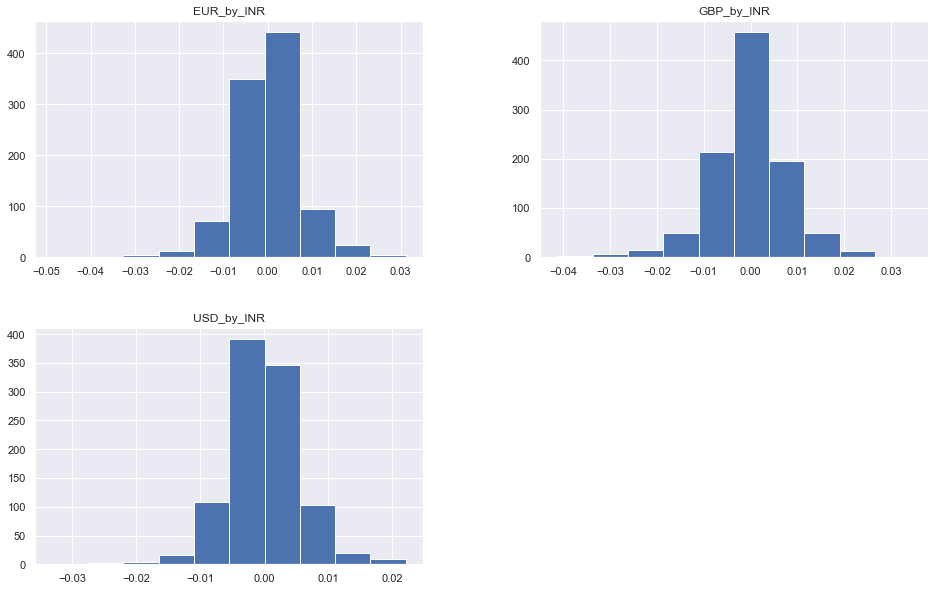

In [60]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
_ = fx_returns.hist(ax=ax.reshape(4)[0:3])
_ = ax[1,1].set_visible(False)
plt.show()

In [82]:
jb_test_pv = jarque_bera(fx_returns)[0]
print(jb_test_pv)

[400.71948342 331.99453917 704.77142186]


In [85]:
fx_weekly_prices = fx_prices.resample('W').first()
fx_weekly_returns = fx_weekly_prices.apply(lambda s: np.log(s) - np.log(s).shift(1),axis=0).dropna()


In [86]:
print( f"Mean:\n{fx_weekly_returns.mean(axis=0)}")
print( f"\nStd:\n{fx_weekly_returns.std(axis=0)}")
print( f"\nAutoCorr:\n{fx_weekly_returns.apply(lambda s: s.autocorr(lag=1))}")

Mean:
USD_by_INR   -0.000007
GBP_by_INR   -0.001022
EUR_by_INR    0.000215
dtype: float64

Std:
USD_by_INR    0.011966
GBP_by_INR    0.016916
EUR_by_INR    0.014977
dtype: float64

AutoCorr:
USD_by_INR    0.115449
GBP_by_INR   -0.123775
EUR_by_INR   -0.059014
dtype: float64


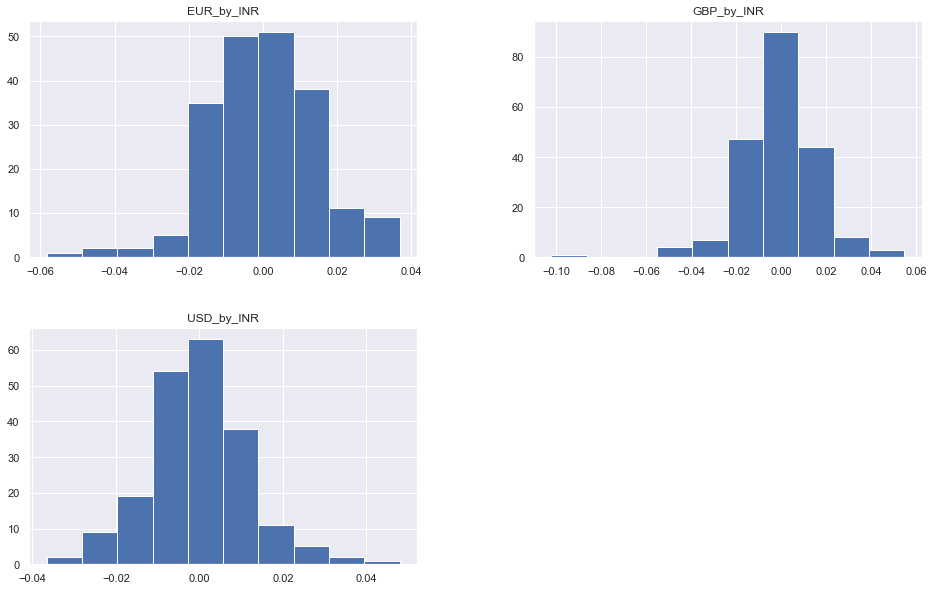

In [88]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
_ = fx_weekly_returns.hist(ax=ax.reshape(4)[0:3])
_ = ax[1,1].set_visible(False)
plt.show()

In [91]:
jb_test_pv = jarque_bera(fx_weekly_returns)[0]
print(jb_test_pv)

[ 30.52965052 352.88463384  11.0065951 ]


## Exercise 2